# Progress of the Philippines' Sustainable Development Goals
In 2015, the United Nations General Assembly created 17 interlinked global goals that was intended to be achieved by 2030. It was said that it would pave the way to "a better and more sustainable future for all". The interlinked global goals was named the **Sustainable Development Goals** (SDG).

In this notebook, 27 different datasets from the Philippine Statistics Authority, the government agency assigned to update the Philippine's data on this goals, would be combined. Fifteen (15) of these datasets are directly about the SDG, while others are indirectly connected to the SDGs.

### Import
Import `os`, `math`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`, and `zscore`.
- `os` is a module that allows the usage of operating system dependent functionality
- `numpy` contains a large collection of mathematical functions
- `pandas` is a software library for Python that is designed for data manipulation and data analysis
- `matplotlib.pyplot` contains functions to create interactive plots
- `seaborn` is a library based on matplotlib that allows visualization
- `zscore` allows the computation of the zscore

In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

## Exploratory Data Analysis
With the combined dataset, there is a substantial amount of raw data to process and analyze. Before performing any statistical analysis, it is good practice to do exploratory data analysis to observe patterns and detect any outliers in the dataset. With this, we can properly identify particular relationships between specific variables.

As this dataset aims to check the progress of the Sustainable Development Goals of the Philippines, we would be exploring the data per indicator.

### SDG #1: No Poverty

### SDG #3: Good Health and Well-Being

### SDG #4: Quality Education

### SDG #7: Affordable and Clean Energy

To start exploring the 7th SDG, let us load the file using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [3]:
sdg7 = pd.read_csv('data_output' + '/sdg_7.csv')
sdg7

,Unnamed: 0,Geolocation,Year,7.1.1 Proportion of pop with electricity
0,0,PHILIPPINES,2009,99.39
1,1,NCR: National Capital Region,2009,100.00
2,2,CAR: Cordillera Administrative Region,2009,100.00
3,3,Region 1: Ilocos Region,2009,100.00
4,4,Region 2: Cagayan Valley,2009,99.96
...,...,...,...,...
211,211,Region 10: Northern Mindanao,2020,94.81
212,212,Region 11: Davao Region,2020,88.40
213,213,Region 12: SOCCSKSARGEN,2020,85.91
214,214,CARAGA: Cordillera Administrative Region,2020,100.00


In [4]:
sdg7 = sdg7.drop('Unnamed: 0', axis = 1)

In [5]:
sdg7 ['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

<AxesSubplot:>

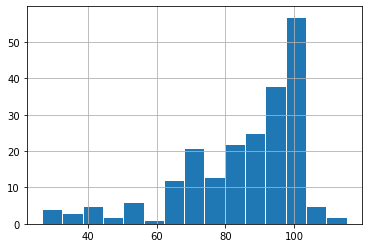

In [6]:
sdg7 ['7.1.1 Proportion of pop with electricity'].hist(bins=15, edgecolor='w')

#### Is there a trend in a region's `Proportion of the population with access to electricity`?

In [7]:
sdg7.groupby(by = 'Geolocation')['7.1.1 Proportion of pop with electricity']

In [ ]:
geolocation_vals = sdg7 ['Geolocation'].unique ()

In [ ]:
geolocation_vals = geolocation_vals [1: ]

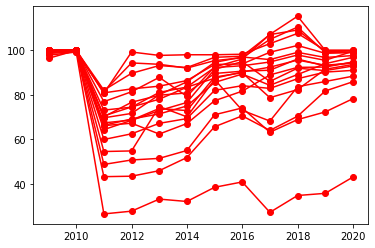

In [9]:
for geo_val in geolocation_vals:
    temp = sdg7 [sdg7 ['Geolocation'] == geo_val]
    plt.plot(temp['Year'], temp['7.1.1 Proportion of pop with electricity'], color='red', marker='o')

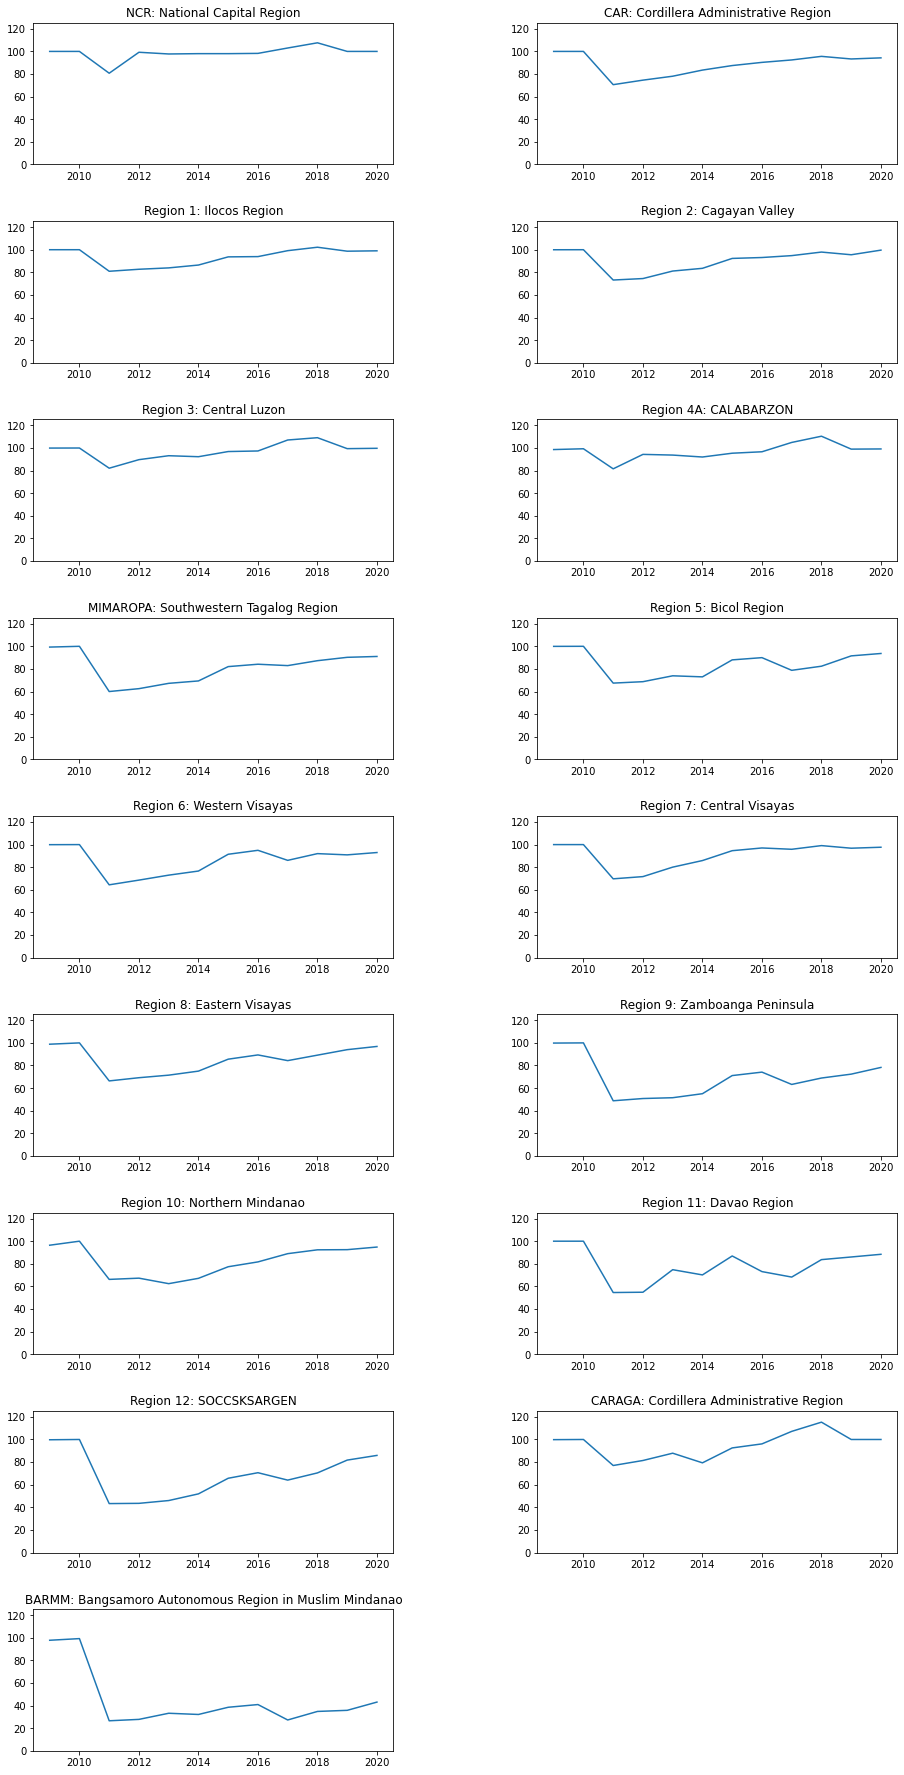

In [48]:
figure, axis = plt.subplots((len (geolocation_vals) + 1) // 2, 2, figsize = (15, 30))
max_ = sdg7['7.1.1 Proportion of pop with electricity'].max()
i = 0
ticks = []
while i <= max_ + 10:
    ticks.append(i)
    i = i + 10

for axis_ in axis:
    for axis__ in axis_:
        axis__.set_ylim([0, max_ + 10])
    
counter = 0
for i in range ((len (geolocation_vals) + 1) // 2):
    for j in range (2):
        if counter < len(geolocation_vals):
            temp = sdg7 [sdg7 ['Geolocation'] == geolocation_vals [counter]]
            axis[i, j].plot(temp ['Year'], temp['7.1.1 Proportion of pop with electricity'])
            axis[i, j].set_title(geolocation_vals [counter])
            counter = counter + 1
        else:
            plt.delaxes(axis[i, j])
            
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.4, hspace = 0.4)
plt.show()

### SDG #8: Decent Work and Economic Growth
Again, using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function, we load the next SDG.

In [10]:
sdg8 = pd.read_csv('data_output' + '/sdg_8.csv')
sdg8

,Unnamed: 0,Geolocation,Year,8.1.1 Annual growth rate of real GDP per capita
0,0,PHILIPPINES,2001,1.007914
1,1,NCR: National Capital Region,2001,0.841128
2,2,CAR: Cordillera Administrative Region,2001,1.900838
3,3,Region 1: Ilocos Region,2001,0.811589
4,4,Region 2: Cagayan Valley,2001,2.147953
...,...,...,...,...
356,356,Region 11: Davao Region,2020,-9.046379
357,357,Region 12: SOCCSKSARGEN,2020,-5.555509
358,358,CARAGA: Cordillera Administrative Region,2020,-8.237564
359,359,BARMM: Bangsamoro Autonomous Region in Muslim ...,2020,-3.881252


In [11]:
sdg8['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

### SDG #10: Reduced Inequalities

### SDG #14: Life Below Water

### SDG #16: Peace, Justice and Strong Institutions

### Exploring all of the Datasets

In [5]:
data = pd.read_csv('data_output' + '/combined_data.csv')
data

,Unnamed: 0,Geolocation,Year,1.2.1. Proportion of population living below the national poverty line,1.4.1p5 Net Enrolment Rate in elementary,1.4.1p6 Net Enrolment Rate in secondary education (Junior High School),1.4.1p6 Net Enrolment Rate in secondary education (Senior High School),1.5.4 Proportion of local governments that adopt and implement local disaster risk reduction strategies in line with national disaster risk reduction strategies,"3.4.1 Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (Total data)",3.7.1 Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied [provided] with modern methods,...,"Changes in Inventories, by Region","Current Health Expenditure by Region, Growth Rates",Current Health Expenditure by Region,Consumption Expenditure GR,Consumption Expenditure %,Gross Capital Formation,GRDP,Population,Drop-out rate,Price Index for Agriculture
0,0,PHILIPPINES,2000,NaN,96.77,66.06,NaN,NaN,NaN,NaN,...,-136845782.0,NaN,NaN,5.7,100.0,579938180.0,3.697556e+09,76723051.0,NaN,NaN
1,1,NCR: National Capital Region,2000,NaN,101.00,79.05,NaN,NaN,NaN,NaN,...,2177317.0,NaN,NaN,8.3,45.9,203930819.0,1.237451e+09,9961971.0,NaN,NaN
2,2,CAR: Cordillera Administrative Region,2000,NaN,94.42,71.19,NaN,NaN,NaN,NaN,...,-6416286.0,NaN,NaN,2.3,2.7,13865180.0,9.044601e+07,1369249.0,NaN,NaN
3,3,Region 1: Ilocos Region,2000,NaN,97.73,87.51,NaN,NaN,NaN,NaN,...,-1891391.0,NaN,NaN,1.3,4.0,24454284.0,1.289450e+08,4209083.0,NaN,NaN
4,4,Region 2: Cagayan Valley,2000,NaN,95.65,77.11,NaN,NaN,NaN,NaN,...,5458610.0,NaN,NaN,4.2,2.4,32773347.0,8.593798e+07,2819641.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,96.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,392,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,393,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,394,CARAGA: Cordillera Administrative Region,2021,NaN,NaN,NaN,NaN,93.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## References